In [1]:
%run Function_set.ipynb
import networkx as nx
import numpy as np
from collections import defaultdict
import random
from numpy import random
import matplotlib.pyplot as plt

In [7]:
network,pos = Make_Question(4,4,Density = 0.85, option = "1-norm", distance = 2)

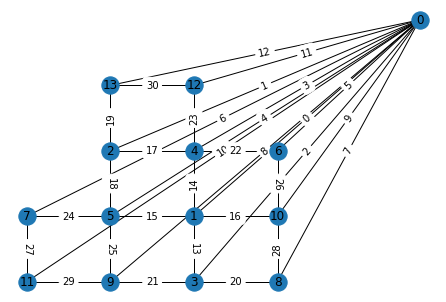

In [8]:
G, compelete_label, graph = complete_Graph(network,pos)

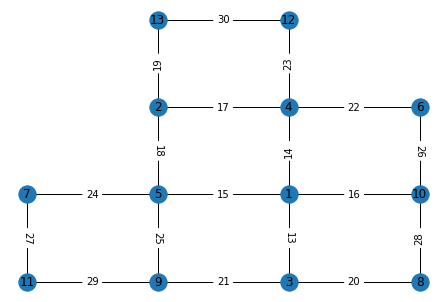

In [9]:
G_prime, sub_edge_label = sub_Graph (network,pos,compelete_label)

In [10]:
Final_map, lowest_edge_number = edge_map(G, compelete_label, sub_edge_label)

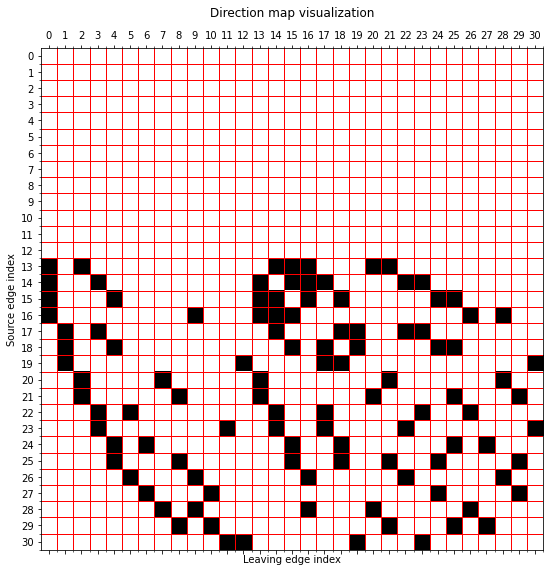

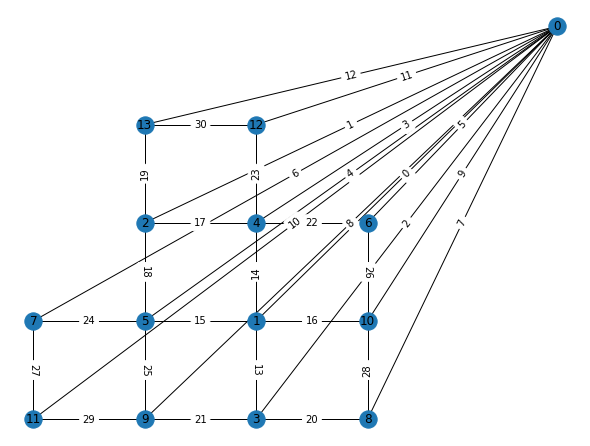

In [11]:
#matfig = plt.figure(figsize=(Final_map.shape[0],Final_map.shape[1]))
matfig = plt.figure(figsize=(9,9))
plt.matshow(Final_map,cmap=plt.cm.binary,fignum=matfig.number)
ax = plt.gca()
#plt.matshow(Final_map,cmap=plt.cm.binary)
plt.xlabel('Leaving edge index')
plt.ylabel('Source edge index')
plt.title ("Direction map visualization")

# Major ticks
ax.set_xticks(np.arange(0, Final_map.shape[0], step=1))
ax.set_yticks(np.arange(0, Final_map.shape[0], step=1))

# Labels for major ticks
ax.set_xticklabels(np.arange(0, Final_map.shape[0], step=1))
ax.set_yticklabels(np.arange(0, Final_map.shape[0], step=1))

# Minor ticks
ax.set_xticks(np.arange(0.5, Final_map.shape[0]+0.5, step=1), minor=True)
ax.set_yticks(np.arange(0.5, Final_map.shape[0]+0.5, step=1), minor=True)

# Gridlines based on minor ticks
ax.grid(which='minor', color='r', linestyle='-', linewidth=1)

plt.show()


plt.figure(2,figsize=(8,6)) 
nx.draw(G,pos,with_labels=True)
net_graph = nx.draw_networkx_edge_labels(G,pos,edge_labels = compelete_label)

In [12]:
# basic_cost shape => (1,number_of_edge)
# such as : basic_cost = np.vstack(np.ones(number_of_edge))
basic_cost = np.vstack(np.ones(len(compelete_label)))

QUBO_Obj = Objective(pos,compelete_label,basic_cost,flow_cost = 1)

In [13]:
a = np.array([1,3,5])
b = np.array([2,4,6,8,10,12])
x,y = np.meshgrid(a,b)
print(x,y)
np.concatenate((x.reshape(-1,1), y.reshape(-1,1)), axis=1)

[[1 3 5]
 [1 3 5]
 [1 3 5]
 [1 3 5]
 [1 3 5]
 [1 3 5]] [[ 2  2  2]
 [ 4  4  4]
 [ 6  6  6]
 [ 8  8  8]
 [10 10 10]
 [12 12 12]]


array([[ 1,  2],
       [ 3,  2],
       [ 5,  2],
       [ 1,  4],
       [ 3,  4],
       [ 5,  4],
       [ 1,  6],
       [ 3,  6],
       [ 5,  6],
       [ 1,  8],
       [ 3,  8],
       [ 5,  8],
       [ 1, 10],
       [ 3, 10],
       [ 5, 10],
       [ 1, 12],
       [ 3, 12],
       [ 5, 12]])

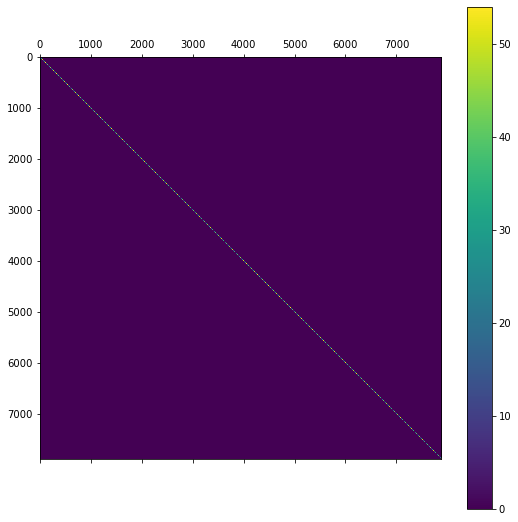

In [87]:
matfig = plt.figure(figsize=(9,9)) 
plt.matshow(QUBO_Obj,fignum=matfig.number)
plt.colorbar()
plt.show()

In [88]:
QUBO_Constraint_1 = Constraint_1(pos,compelete_label,Final_map,penalty = 1)

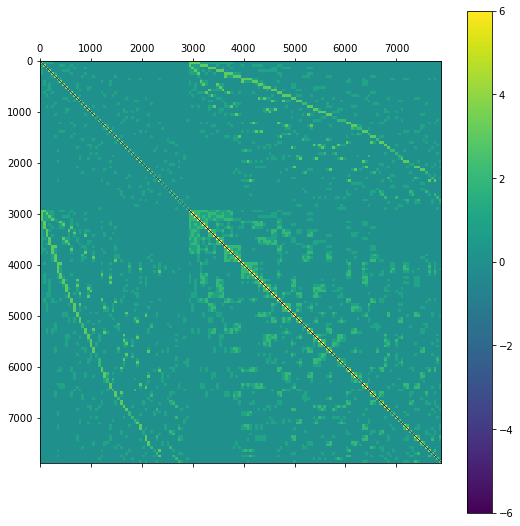

In [89]:
matfig = plt.figure(figsize=(9,9)) 
plt.matshow(QUBO_Constraint_1,fignum=matfig.number)
plt.colorbar()
plt.show()

In [90]:
QUBO_Constraint_2 = Constraint_2(pos,compelete_label,Final_map,penalty = 1)

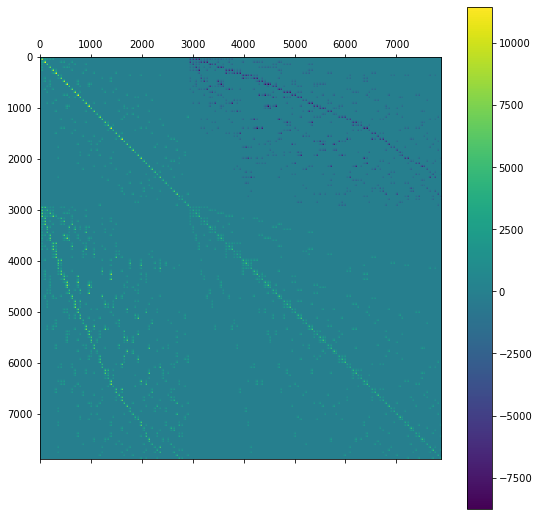

In [91]:
matfig = plt.figure(figsize=(9,9)) 
plt.matshow(QUBO_Constraint_2,fignum=matfig.number)
plt.colorbar()
plt.show()

In [92]:
QUBO_matrix = QUBO_Obj + QUBO_Constraint_1 + QUBO_Constraint_2

print(np.shape(QUBO_matrix ))

(7884, 7884)


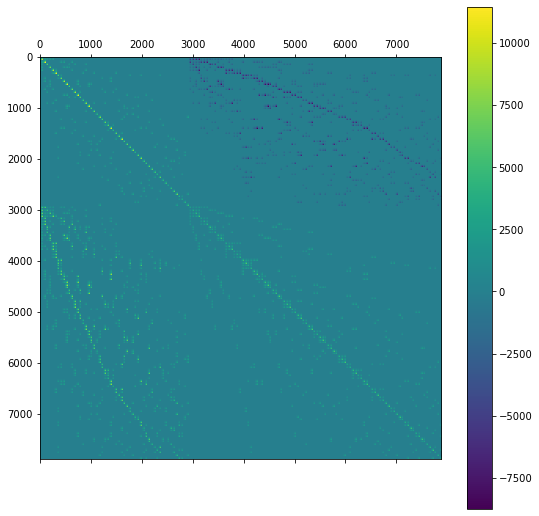

In [93]:
matfig = plt.figure(figsize=(9,9)) 
plt.matshow(QUBO_matrix,fignum=matfig.number)
plt.colorbar()
plt.show()

In [94]:
m_t_u,m_t_l = capacity_subtree_limit_generator(pos,lowest_edge_number)

QUBO_matrix_1 = Constraint_3_part_1(pos,compelete_label,lowest_edge_number,QUBO_matrix,m_t_u,penalty = 1)
QUBO_matrix_2 = Constraint_3_part_2(pos,compelete_label,lowest_edge_number,QUBO_matrix_1,m_t_l,penalty = 1)

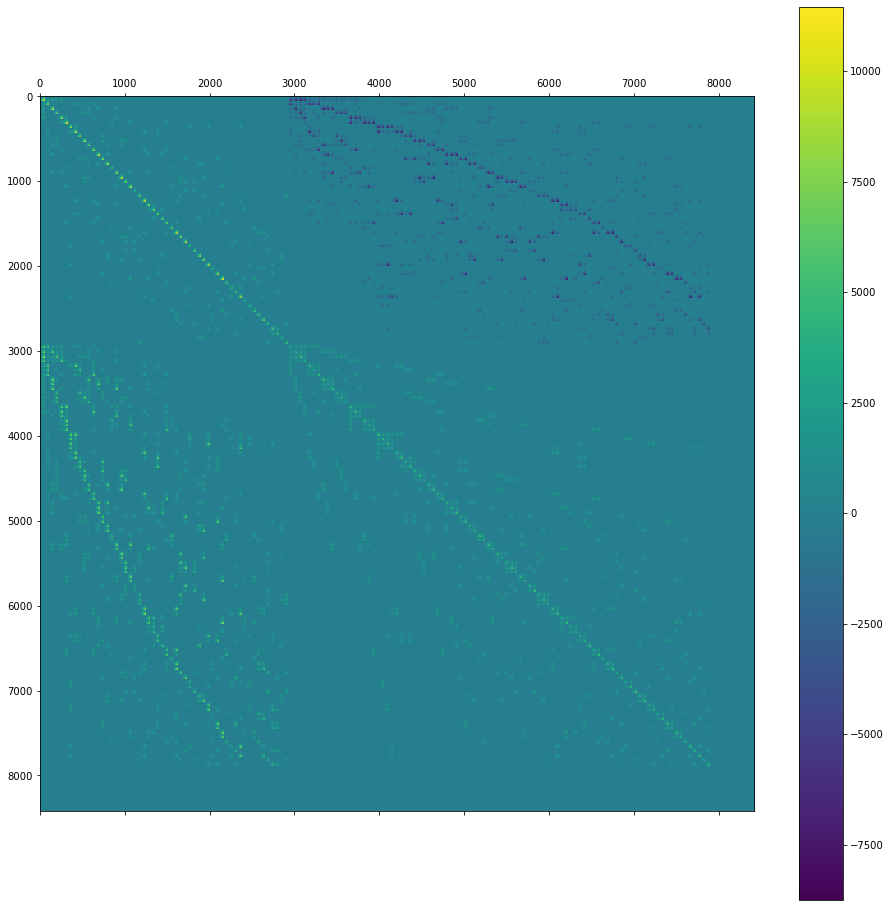

In [95]:
matfig = plt.figure(figsize=(16,16)) 
plt.matshow(QUBO_matrix_2,fignum=matfig.number)
plt.colorbar()
plt.show()

In [96]:
Ban_map = np.zeros((lowest_edge_number*(len(pos)-1)))

QUBO_Constraint_4 = Constraint_4(lowest_edge_number,Ban_map,penalty = 100)

QUBO_matrix_2[:lowest_edge_number*(len(pos)-1),:lowest_edge_number*(len(pos)-1)] +=  QUBO_Constraint_4

Final_QUBO_matrix = QUBO_matrix_2

print(np.shape(Final_QUBO_matrix))

(8414, 8414)


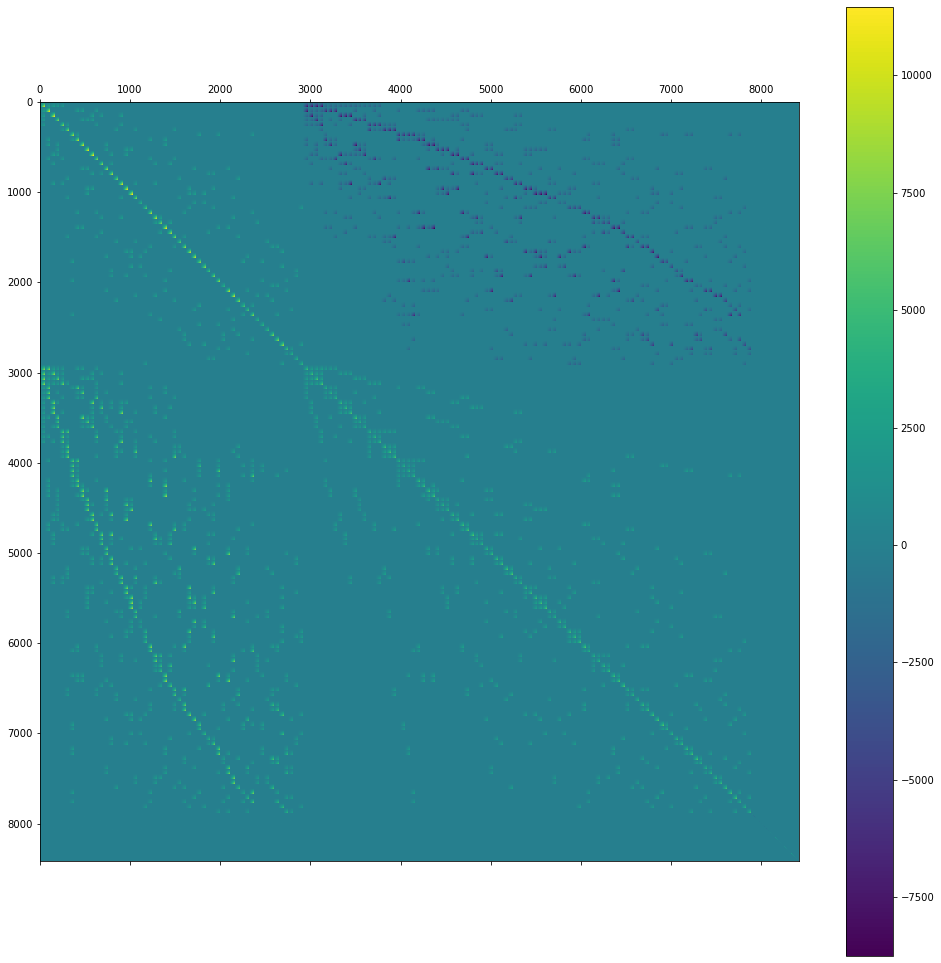

In [97]:
matfig = plt.figure(figsize=(17,17)) 
plt.matshow(QUBO_matrix_2,fignum=matfig.number)
plt.colorbar()
plt.show()